In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


1.3.3b) Add radiation AND use CURRENT VALUE for Or is 6*10^-5 (when H_0 is 70km/s/Mpc)

13.470541991177265
if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (0.30,0.70,-0.00,0.000060)
Age of this universe = 13.47093 Gyr
The age of the universe at z=1090.00 is 0.00039 Gyr
The age of the universe at z=1090.00 is 3.89880e+05 years


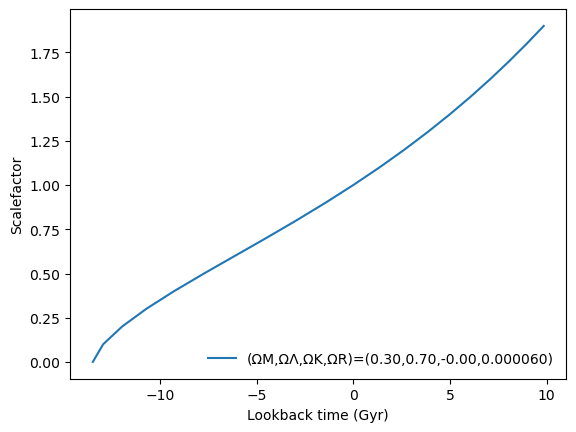

In [6]:
def adotinv(a,om,ol,ok,Or):
    adot = a*(np.sqrt(om * a**(-3) + ok * a**(-2) + ol + Or * a**(-4)))  # EQUATION 9 = adot/H 
    return 1.0/adot

Or = 6*10**-5
ol = 0.7
om = 0.3

a_arr = np.arange(0.0,2,0.1)

ok = 1-om-ol-Or
t_lookback_Gyr = np.array([integrate.quad(adotinv, 1.0, a_end, args=(om,ol,ok,Or))[0] for a_end in a_arr])/H0y
plt.plot(t_lookback_Gyr,a_arr,label='(ΩM,ΩΛ,ΩK,ΩR)=(%.2f,%.2f,%.2f,%.6f)'%(om,ol,ok,Or))
#next lines for print statement


# choose your z
z=1090
a_2=1/(1+z)
t_lookback_Gyr_2= integrate.quad(adotinv, a_2, 1, args=(om,ol,ok,Or))[0]/H0y
print(t_lookback_Gyr_2)       #   FIRST PRINTOUT = lookback time at z


t_lookback_Gyr = integrate.quad(adotinv, 0, 1, args=(om,ol,ok,Or))  # RHS = RHS of EQN ()* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
age_Gyr = t_lookback_Gyr[0]/H0y
print('if universe parameters are (ΩM,ΩΛ,ΩK,ΩR) = (%.2f,%.2f,%.2f,%.6f)'%(om,ol,ok,Or))
print('Age of this universe = %.5f Gyr'%(age_Gyr))

age_z=age_Gyr-t_lookback_Gyr_2
age_z_years = age_z * 10**9  # Convert age_z from Gyr to years
print("The age of the universe at z=%.2f is %.5f Gyr" % (z, age_z))
print("The age of the universe at z=%.2f is %.5e years" % (z, age_z_years))

    
#plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
#plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()